In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
main_data=pd.read_csv('/Users/yaswanthkumarvejandla/Downloads/AI ML Engineer/projects/ml_project/ai_job_market.csv')

In [4]:
data=main_data.copy()
data.head()

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain"
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow"
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn"
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow"
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain"


In [5]:
len(data)

2000

In [6]:
data.shape

(2000, 12)

In [7]:
data.isnull().sum()

job_id              0
company_name        0
industry            0
job_title           0
skills_required     0
experience_level    0
employment_type     0
location            0
salary_range_usd    0
posted_date         0
company_size        0
tools_preferred     0
dtype: int64

In [8]:
data.isna().sum()

job_id              0
company_name        0
industry            0
job_title           0
skills_required     0
experience_level    0
employment_type     0
location            0
salary_range_usd    0
posted_date         0
company_size        0
tools_preferred     0
dtype: int64

In [9]:
data[['min_salary', 'max_salary']] = data['salary_range_usd'].str.split('-', expand=True)
data['min_salary'] = data['min_salary'].astype(int)
data['max_salary'] = data['max_salary'].astype(int)
data['avg_salary'] = (data['min_salary'] + data['max_salary']) / 2
data['posted_date'] = pd.to_datetime(data['posted_date'])


In [10]:
data.columns

Index(['job_id', 'company_name', 'industry', 'job_title', 'skills_required',
       'experience_level', 'employment_type', 'location', 'salary_range_usd',
       'posted_date', 'company_size', 'tools_preferred', 'min_salary',
       'max_salary', 'avg_salary'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   job_id            2000 non-null   int64         
 1   company_name      2000 non-null   object        
 2   industry          2000 non-null   object        
 3   job_title         2000 non-null   object        
 4   skills_required   2000 non-null   object        
 5   experience_level  2000 non-null   object        
 6   employment_type   2000 non-null   object        
 7   location          2000 non-null   object        
 8   salary_range_usd  2000 non-null   object        
 9   posted_date       2000 non-null   datetime64[ns]
 10  company_size      2000 non-null   object        
 11  tools_preferred   2000 non-null   object        
 12  min_salary        2000 non-null   int64         
 13  max_salary        2000 non-null   int64         
 14  avg_salary        2000 n

In [12]:
data.head()

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,min_salary,max_salary,avg_salary
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain",92860,109598,101229.0
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow",78523,144875,111699.0
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn",124496,217204,170850.0
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow",50908,123743,87325.5
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain",98694,135413,117053.5


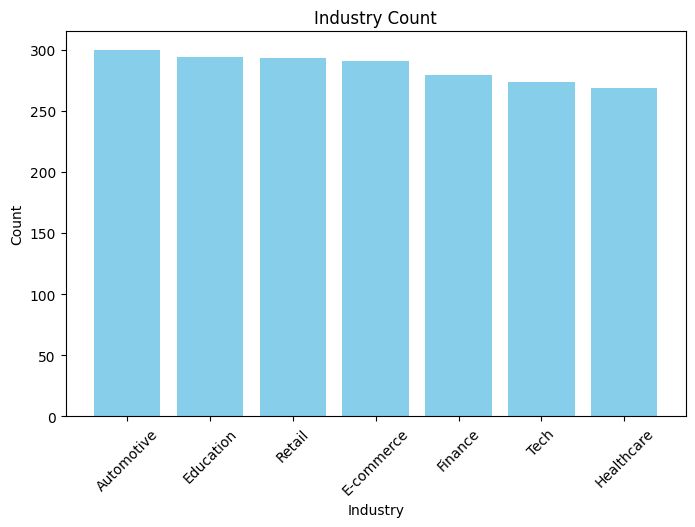

In [13]:
plt.figure(figsize=(8,5))
plt.bar(data['industry'].value_counts().index,
        data['industry'].value_counts().values,
        color='skyblue')
plt.title('Industry Count')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

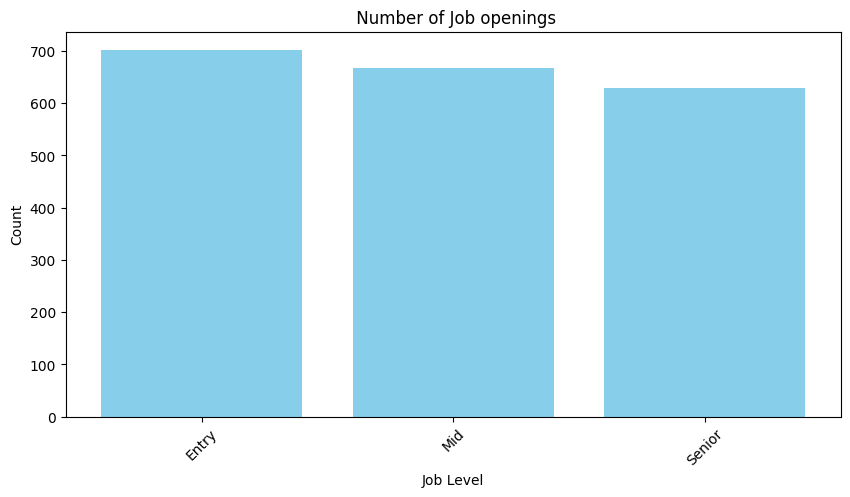

In [14]:
plt.figure(figsize=(10,5))
plt.bar(data['experience_level'].value_counts().index,
        data['experience_level'].value_counts().values,
        color='skyblue')
plt.title(' Number of Job openings')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

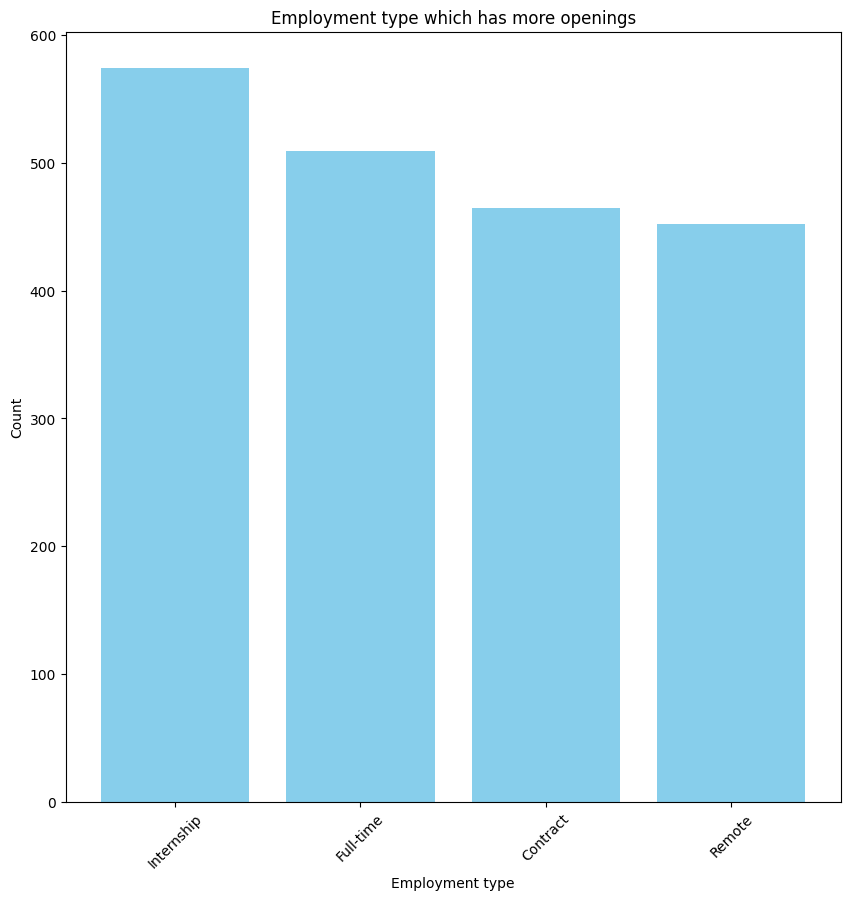

In [15]:
plt.figure(figsize=(10,10))
plt.bar(data['employment_type'].value_counts().index,
        data['employment_type'].value_counts().values,
        color='skyblue')
plt.title('Employment type which has more openings')
plt.xlabel('Employment type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/md/yz4wns293812bb6m3pw1zpjm0000gn/T/ipykernel_43229/695165546.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='industry', data=data, palette='Set2')


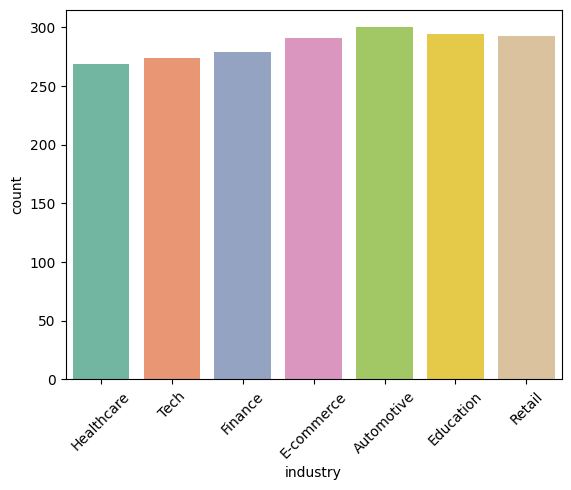

In [16]:
sns.countplot(x='industry', data=data, palette='Set2')
plt.xticks(rotation=45)
plt.show()

In [17]:
data.groupby('industry')['avg_salary'].mean().sort_values(ascending=False)

industry
E-commerce    124745.302405
Automotive    124546.021667
Tech          123217.423358
Finance       123040.451613
Retail        122791.283276
Education     121796.690476
Healthcare    120964.239777
Name: avg_salary, dtype: float64

<Axes: xlabel='avg_salary', ylabel='Count'>

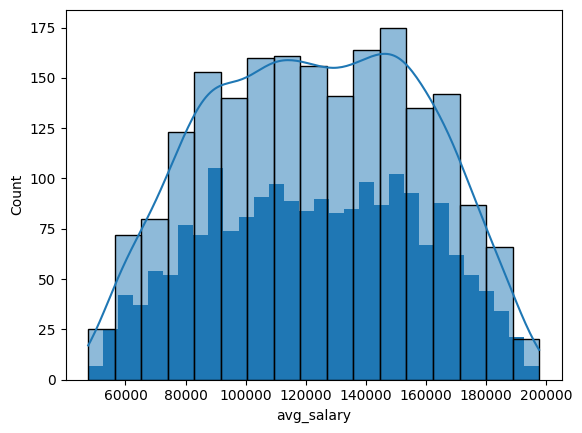

In [18]:
plt.hist(data['avg_salary'], bins=30)
sns.histplot(data['avg_salary'], kde=True)

<Axes: xlabel='experience_level', ylabel='avg_salary'>

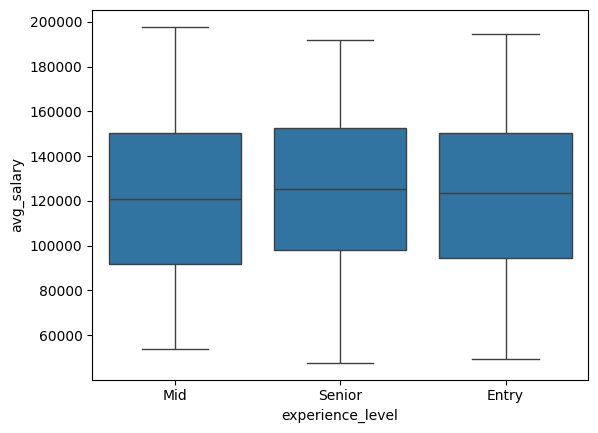

In [19]:
sns.boxplot(x='experience_level', y='avg_salary', data=data)


In [42]:
all_skills = data['skills_required'].str.split(',\s*').explode()

# Count frequency
skill_counts = all_skills.value_counts().head(10)  # top 10 skills

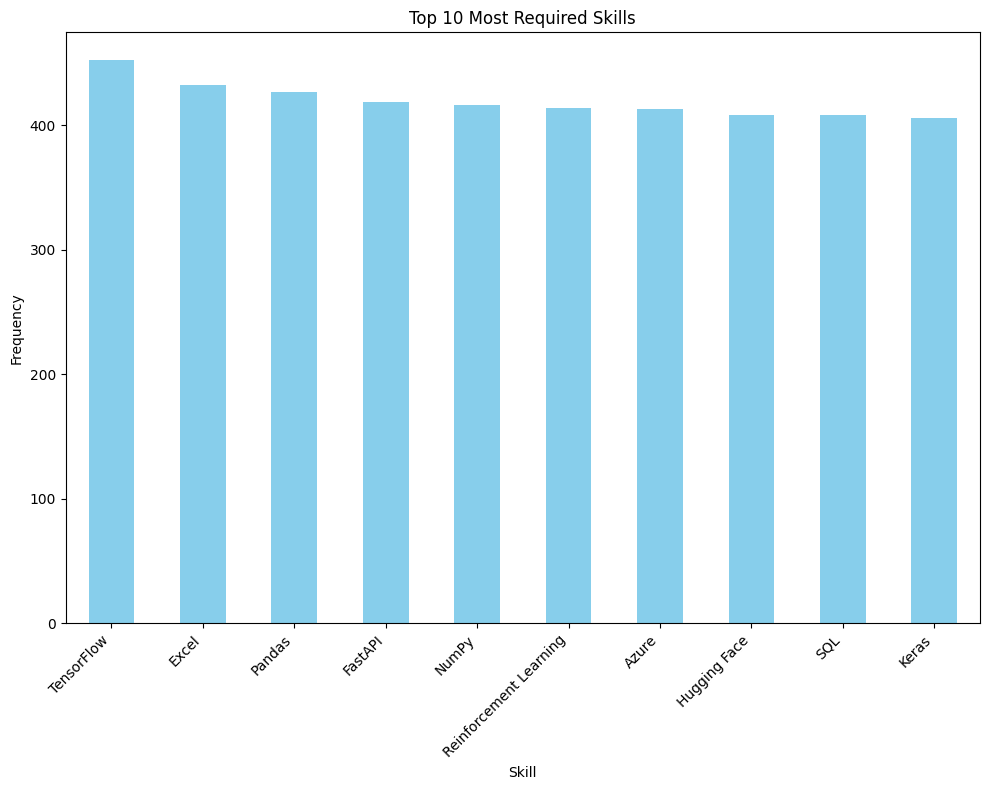

In [50]:
plt.figure(figsize=(10,8))
skill_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Required Skills')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

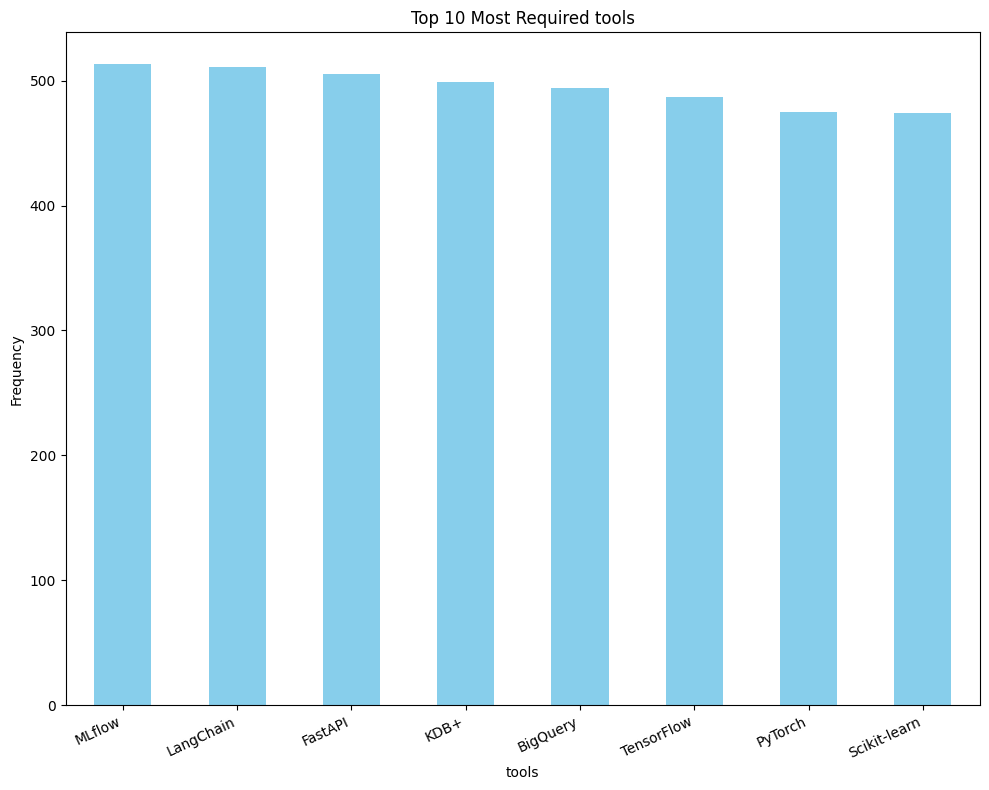

In [58]:
tol_tools = data['tools_preferred'].str.split(',\s*').explode()

# Count frequency
tool_counts = tol_tools.value_counts().head(10)  # top 10 skills

plt.figure(figsize=(10,8))
tool_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Required tools')
plt.xlabel('tools')
plt.ylabel('Frequency')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()